In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [3]:
ims = search_images_ddg("grizzly bear")
len(ims)

200

In [4]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

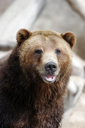

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [7]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [8]:
fns = get_image_files(path)
fns

(#552) [Path('bears/black/03f6c284-b1df-416b-9146-8c765e170723.JPG'),Path('bears/black/0869f303-1d26-495b-94ed-0e6a9b916424.jpg'),Path('bears/black/097cea6c-ac19-4553-bead-b463d3f1eb2d.jpg'),Path('bears/black/0a086394-5d37-4ee1-9d83-0f040f009bc4.jpg'),Path('bears/black/0ab25306-a767-4ca6-aeef-359039344c7c.jpg'),Path('bears/black/0abb7471-813f-4d47-be82-7d3f120a7599.jpeg'),Path('bears/black/0d77037a-ac23-4071-9d56-014fa51c4f4a.JPG'),Path('bears/black/0f73b022-46dc-467f-84f4-42426b5deb2e.jpg'),Path('bears/black/119005b2-cd14-4e5c-aaca-f83980d7b734.jpg'),Path('bears/black/11bc7ba2-27d9-48c3-8cc8-acfdfcbb44b6.png'),Path('bears/black/153f228d-feeb-43fe-ae65-6dfe7a42d456.jpg'),Path('bears/black/163084c8-2979-438d-a48e-f3c36308e97e.png'),Path('bears/black/18326ef5-8f50-46f1-8f9f-5530effe1c0d.jpg'),Path('bears/black/1a4eb6c9-fd90-477c-8e78-8cfd2e2624df.jpg'),Path('bears/black/1aba27e0-d4ef-42ce-8ff5-1ff6ed269678.jpg'),Path('bears/black/1ac82fbb-b88a-4a7d-8063-a114283aed48.jpg'),Path('bears/bla

In [9]:
failed = verify_images(fns)
failed

(#36) [Path('bears/black/0a086394-5d37-4ee1-9d83-0f040f009bc4.jpg'),Path('bears/black/0d77037a-ac23-4071-9d56-014fa51c4f4a.JPG'),Path('bears/black/1bd5baaf-4405-4b48-8531-aa85a45d9b17.jpg'),Path('bears/black/3f2f6aef-624d-4e56-bb84-d2b2d8fba93e.jpg'),Path('bears/black/47ef46c9-e484-4178-b76b-dc7edd1ac1d1.jpg'),Path('bears/black/55d1282b-2572-48c5-88e2-e1ebf4c10dc9.jpg'),Path('bears/black/8eb1e3c0-70c2-4fa9-a238-3b0b21eee6f2.jpg'),Path('bears/black/92372cac-ba02-410b-a56c-1de44537b608.jpg'),Path('bears/black/9784ac99-4e81-4481-97f2-547ca55f5070.JPG'),Path('bears/black/9d47bcdd-81c3-4a4b-82fd-8c08cb9c1707.jpg'),Path('bears/black/bd75a6fb-394c-4293-9e4e-b0cd378b8953.jpg'),Path('bears/black/c584231e-2280-44cd-973f-f160acb99216.jpg'),Path('bears/black/c980faed-2480-4d33-a2d4-c03880aec7a0.jpg'),Path('bears/black/cb160667-e368-425b-9ec8-cb4b192e20d0.jpg'),Path('bears/black/d0f5b96c-c402-4260-8393-1a72674b42dc.jpg'),Path('bears/grizzly/00b4c2e2-372a-4208-9fd1-94fbfe590598.jpg'),Path('bears/gri

In [10]:
failed.map(Path.unlink)

(#36) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [11]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      ~/sw/miniconda3/lib/python3.12/site-packages/fastai/vision/utils.py
Type:      function

In [12]:
bears = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)])

In [13]:
dls = bears.dataloaders(path)

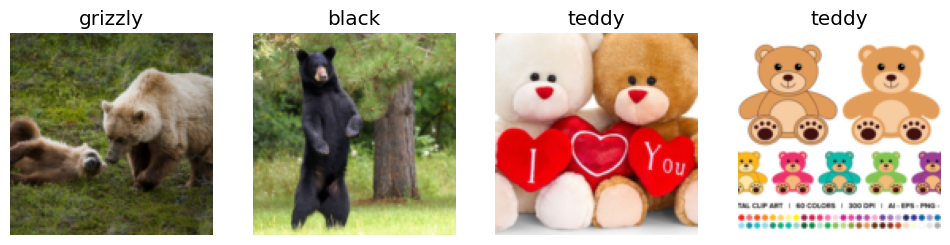

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

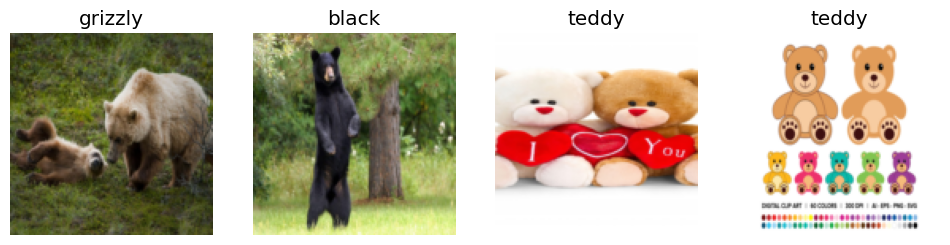

In [15]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

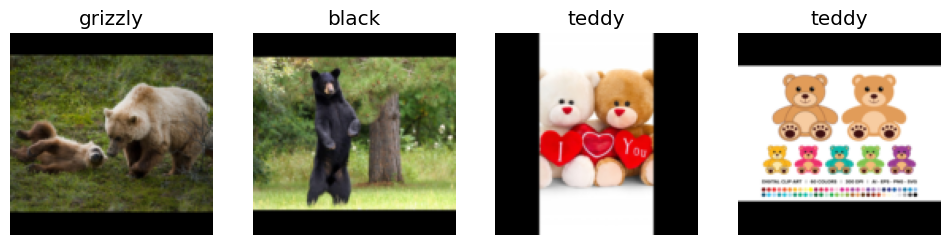

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

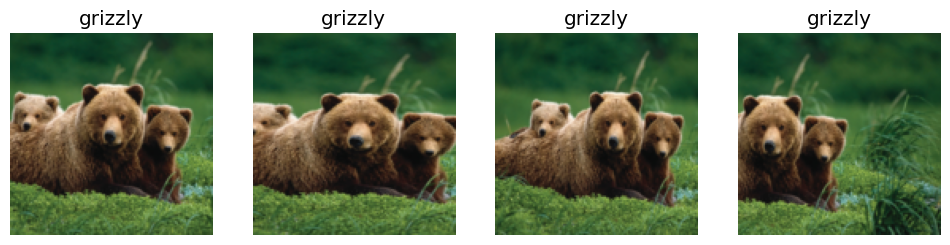

In [17]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

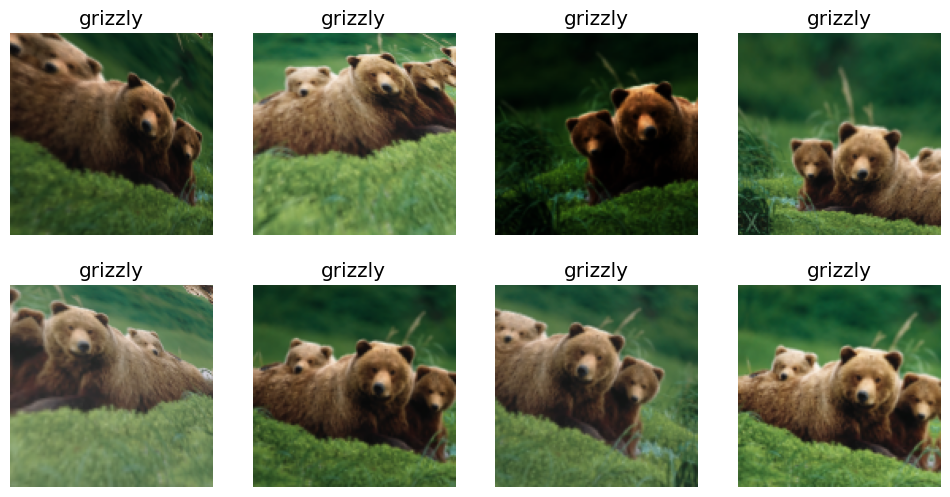

In [18]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate, path=".models")
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/rajesh/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [02:45<00:00, 283kB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.895738,0.121581,0.019417,00:18


/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.207438,0.127279,0.038835,00:16
1,0.173503,0.147558,0.038835,00:16
2,0.131159,0.150577,0.029126,00:16
3,0.114531,0.157764,0.038835,00:15


/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.1

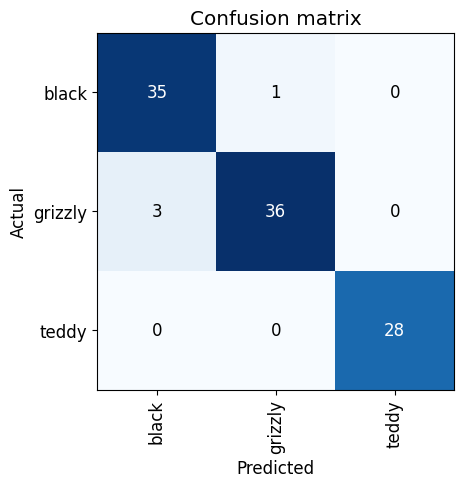

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

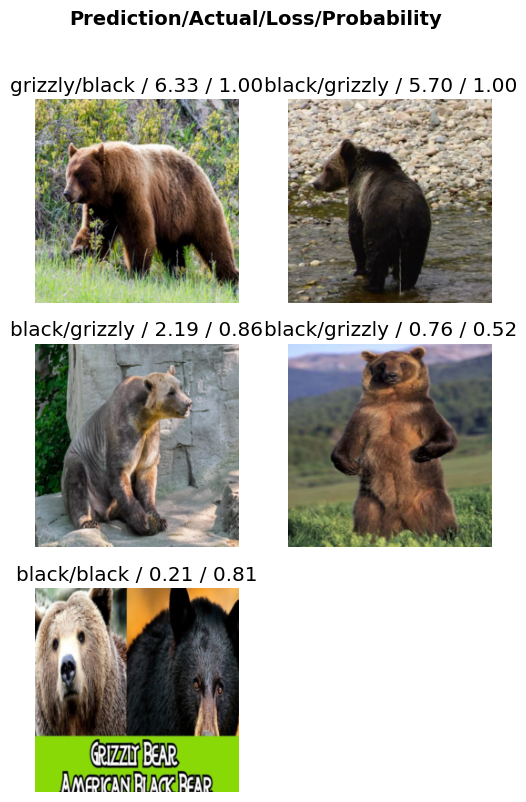

In [22]:
interp.plot_top_losses(5, nrows=3)

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rajesh/sw/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
learn.export()

In [26]:
path = Path(".models")
path.ls(file_exts='.pkl')

(#1) [Path('.models/export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [31]:
label, _, probs = learn_inf.predict('images/grizzly.jpg')

In [32]:
dict(zip(learn_inf.dls.vocab, map(float, probs)))

{'black': 0.0005410559242591262,
 'grizzly': 0.9991472959518433,
 'teddy': 0.0003115355793852359}